In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression 
from sklearn.metrics import mean_squared_error
import numpy as np

OLS: test MSE =  1502077.4348215673
LASSO: test MSE =  1502356.4555399297


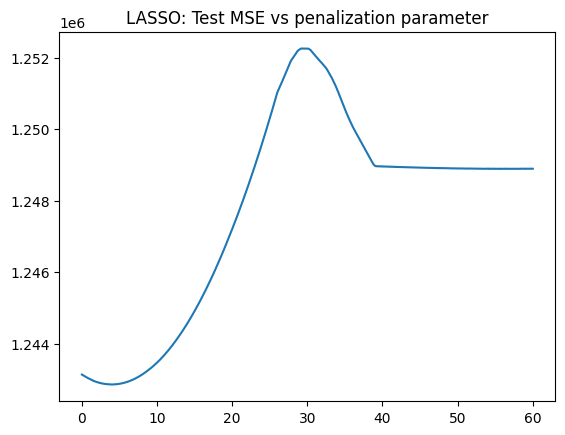

RIDGE: test MSE =  1504968.4737527145


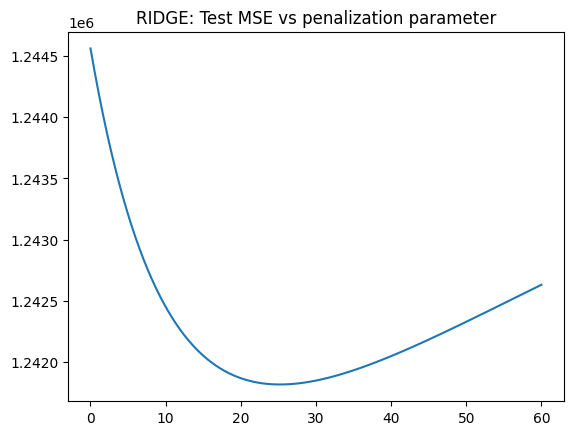

In [7]:
data = pd.read_csv('College.csv')

# set data and grid:

Y = data['Apps']
X = data.drop('Apps', axis=1)
X['Private'] = X['Private'] == 'Yes'
Y_train = Y[:600]
X_train = X[:600]
Y_test = Y[600:]
X_test = X[600:]

alphas = np.linspace(0.01,60,1000)

# OLS:
reg = LinearRegression().fit(X_train, Y_train)
print('OLS: test MSE = ', mean_squared_error(Y_test, reg.predict(X_test)))

# LASSO:
reg = LassoCV(cv=20, random_state=0, alphas=alphas).fit(X_train, Y_train)
print('LASSO: test MSE = ', mean_squared_error(Y_test, reg.predict(X_test)))
plt.plot(reg.alphas_, np.mean(reg.mse_path_, axis=1))
plt.title('LASSO: Test MSE vs penalization parameter')
plt.show()

# RIDGE:
reg = RidgeCV(cv=None, alphas=alphas, store_cv_values=True).fit(X_train, Y_train)
print('RIDGE: test MSE = ', mean_squared_error(Y_test, reg.predict(X_test)))
plt.plot(reg.alphas, np.mean(reg.cv_values_, axis=0))
plt.title('RIDGE: Test MSE vs penalization parameter')
plt.show()